In [34]:


# Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier# Step1: Create data set

import warnings
warnings.filterwarnings("ignore")

wine_df = pd.read_csv('C:\\wine.csv')


X = wine_df.iloc[:, 1:13].values 
y = wine_df.iloc[:, 0].values

print(X)
print(y)


[[14.23  1.71  2.43 ...  5.64  1.04  3.92]
 [13.2   1.78  2.14 ...  4.38  1.05  3.4 ]
 [13.16  2.36  2.67 ...  5.68  1.03  3.17]
 ...
 [13.27  4.28  2.26 ... 10.2   0.59  1.56]
 [13.17  2.59  2.37 ...  9.3   0.6   1.62]
 [14.13  4.1   2.74 ...  9.2   0.61  1.6 ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


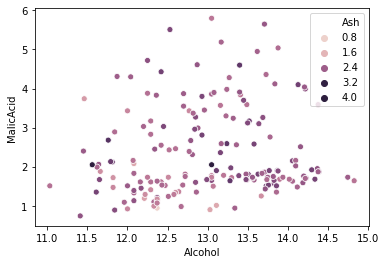

In [22]:

# Scatterplot
# Scatterplot
ax = sns.scatterplot(x=wine_df.iloc[:, 1], y=wine_df.iloc[:, 2], hue=wine_df.iloc[:, 3], data=wine_df)


In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9444444444444444

In [25]:

# Fit a Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9722222222222222

In [37]:

# Fit a AdaBoost model
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
# Yeah!!


1.0

In [44]:

# Let's use AdaBoost to make a prediction of a label!
clf.predict([[12,2,2,21,98,3,2,0,1,3,1,3]])

# Class=2 is pretty darn close to what we see in tha actual data set, but this vector of features never actually shows up in the dataset, so the model learned how to make predictions, and did not simply memorize the data in the training dataset.

array([2], dtype=int64)

In [45]:

clf.predict([[15,4,3,24,96,2,1,1,1,9,1,2]])

# Class=3 is pretty darn close to what we see in tha actual data set, but this vector of features never actually shows up in the dataset, so the model learned how to make predictions, and did not simply memorize the data in the training dataset.

array([3], dtype=int64)

In [27]:

# Fit a Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9444444444444444

In [35]:

# Log Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9166666666666666

In [29]:

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9444444444444444

In [30]:

# Support Vector Machine
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# this accuracy is pretty low; we can discard this one.

0.5833333333333334

In [31]:


# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8333333333333334

In [32]:

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8333333333333334

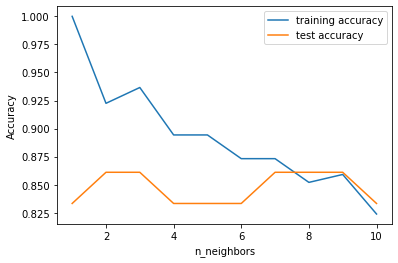

In [33]:

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')


In [ ]:

# Data:
# https://gist.github.com/tijptjik/9408623
